# The Monty Hall Problem 

_with thanks to Jess Tierney, who uses the Monty Hall problem to talk about Bayesian statistics as well_

The Monty Hall problem is a classic example of the somewhat counter-intuitive nature of probability, often [infurating](https://www.wired.com/2014/11/monty-hall-erdos-limited-minds/), and a chance to demonstrate both Monte Carlo approaches to a probability problem (the brute force approach favored by your instructor, as you now know, for most problems) and an example of how we can use Bayes Rule to get at the answer we want given some related probabilities of what we know.  

Monty Hall was the host of a gameshow called 'Let's Make a Deal' that first came on the air in the 1960s (check out Youtube videos of the old shows, it is pretty wild).  Somewhat like 'The Price is Right', contestant were picked from the audience by the host, and they were usually wearing (often bizarre or outrageous) costumes.  Contestants then engaged in making deals with Monty (hence the name of the show), typically choosing from various curtains or closed doors to try and win prizes or potentially trade what they had already won for the chance at some greater prize (a new car, for instance).  Contestents were at risk however of trading for or selecting a door with a 'zonk' -- a live animal, for instance@ -- and getting nothing of value in the end (unless you needed a live animal, I suppose).

The 'Monty Hall Problem' first appeared as a [Letter to the Editor](https://www.tandfonline.com/doi/abs/10.1080/00031305.1975.10479121) (and a second [follow-up letter](https://www.jstor.org/stable/2683443?seq=4)) of _The American Statistician_ in 1975 as a counter-intuitive probability puzzle.  At the time, the author of the letter Steve Selvin, framed the problem in terms of boxes that held either nothing or a car.  The later version of this, where the empty boxes were replaced by doors with goats behind them, apparently comes from [_Parade_ magazine](https://web.archive.org/web/20130121183432/http://marilynvossavant.com/game-show-problem/) (!) in 1990.  Apparently (I have not seen the movie), this puzzle also features in the 2008 movie [_21_](https://en.wikipedia.org/wiki/21_(2008_film)) about [a group of MIT students became experts in card counting and won millions of dollars playing blackjack in Las Vegas](https://en.wikipedia.org/wiki/Bringing_Down_the_House_(book)). 

Here's the problem:  

> Suppose you’re on  the 'Let's Make a Deal' game show, and the host Monty Hall gives you the choice of picking from three doors.  Behind one of the doors is a fancy new car, but behind the other two doors are goats.  You pick a door, say **Door #1**, and Monty Hall, _who knows what’s behind the doors_, opens another door, say **Door #2**, which has a goat behind it. Monty then says to you, 'Do you want to **switch** the door you selected from Door #1 to Door #3"?  The question is, should you **switch** doors or should you **stay** with your original choice? 

At first thought, it seems you do not gain anything from switching and you might as well stay with your original choice.  Wherever the car was when you made the choice, it is still there, and it may seem like your chances of being correct have not changed just because one of the doors was opened.  But in fact it is possible to show that you have a better chance of winning the car if you **switch** doors than if you stay with your original choice!   I will tell you that _I_ did not believe this when I first heard of this puzzle and the solution, so I wrote a MATLAB simulation to run through the choice to switch or stay thousands of time and ... saw it was true that you are better of switching.

Let's do the same thing now in Python.  The function below is a much improved version of the (s)crappy function I wrote in MATLAB many years ago (in my original function, I had to select as an input variable whether I would always swtich or always stay with the same door -- the function below now allows us to see the cumulative consequences of either choice).  

## Monte Carlo Approach to the Monty Hall Problem

In [ ]:
import numpy as np

def monty_hall_simulation(iterations=10000):
    
    # initialize the counters for wins when switching or when staying
    switch_wins = 0
    stay_wins = 0
    
    for _ in range(iterations):
        
        # randomly place the car behind one of the three doors
        car = np.random.randint(0, 3)  # car is now behind door 0, 1, or 2
        
        # the contestant makes an initial choice (here we simulate this by randomly choosing a door)
        initial_choice = np.random.randint(0, 3)
        
        # ths loop determines which doors are available for Monty to open - he won't reveal the car and he can't open the contestant's choice
        possible_doors_to_reveal = []
        for door in range(3): # loop through all 3 doors ... 
            
            # ... and add this door to the list of possible reveal doors only if it's not the contestant's choice and it doesn't have the car
            if door != initial_choice and door != car:
                possible_doors_to_reveal.append(door)
        
        # Monty then randomly chooses one door to reveal from the possible options we identified in the loop above
        monty_reveal = np.random.choice(possible_doors_to_reveal)
        
        # The contestant can now choose to switch or stay: if the contestant switches, their new choice must be the door not initially chosen and not opened by Monty
        switch_choice = None # initial switch or stay choice
        for door in range(3): 
            if door != initial_choice and door != monty_reveal: # set the conditions for a possible switch
                switch_choice = door
                break  # we stop as soon as we find the first valid door we can switch to
        
        # now determine if the contestant wins by switching or by staying, based on the 'car' location set above 
        if switch_choice == car:
            switch_wins += 1 # increment wins counter for switching
        if initial_choice == car:
            stay_wins += 1 # increment wins counter for staying
    
    # upon completing the simulation iterations, we calculate the win probabilities for switch vs. stay
    switch_win_probability = switch_wins / iterations
    stay_win_probability = stay_wins / iterations
    
    print(f"Probability of winning by staying: {stay_win_probability:.3f}")
    print(f"Probability of winning by switching: {switch_win_probability:.3f}")

# Run the simulation
monty_hall_simulation(10000)


For a sufficient number of iterations (many less than the 10,000 I use above) the probability of winning by switching converges to 2/3 quite quickly.  You are better off from a probabilistic point of view switching (an outcome which is tied to the fact that Monty will always open a door that reveals a goat). 

## A Bayesian approach to the Monty Hall problem

Instead of the brute force Monte Carlo simulation we did above, we can apply Bayes Rule to this problem.  We are interested in solving for one of the two probability statements using Bayes Rule:

$
P(D_1 \mid G_2) = \frac{P(G_2 \mid D_1) \cdot P(D_1)}{P(G_2)}
$

and

$
P(D_3 \mid G_2) = \frac{P(G_2 \mid D_3) \cdot P(D_3)}{P(G_2)}
$

where:
- $P(D_1)$, $P(D_2)$, $P(D_3)$: The initial probability the car is behind Door #1, Door #2, or Door #3, equal to $1/3$
- $P(D_1 \mid G_2)$: The probability that the car is behind Door 1 given that Monty opened Door 2 (the posterior)
- $P(D_3 \mid G_2)$: The probability that the car is behind Door 3 given that Monty opened Door 2 (the complementary posterior)
- $P(G_2 \mid D_1)$: The probability that Monty opens Door 2 given the car is behind Door 1 (the likelihood)
- $P(G_2 \mid D_3)$: The probability that Monty opens Door 2 given the car is behind Door 3 (the likelihood for the complementary posterior)
- $P(G_2)$: The total probability that Monty opens Door 2, regardless of where the car is (the marginal probability in the denominator)

In otherwords, we want to know what the probability of the car being behind Door #1 is if Door #2 had a goat ('Should we stay with our original choice?') and/or the probability of the car being behind Door #3 of Door #2 had a goat ('Should we switch our original choice?').

Let's walk through the steps of solving this problem one by one.

### Define the Prior Probabilities

We know a few things off right away that we can express as simple probabilities.  For instance, when we first made our choice of doors, the chance of the car being behind any of them was equal, or $1/3$.  The first and third of these will serve as our priors in the two equations.  The second will be useful for calculating the marginal probability.

In [2]:
P_D1 = 1/3  # probability that the car is behind Door 1 (our initial choice, still unopened)
P_D2 = 1/3  # Initial probablity that the car is beind Door 2 -- we will know soon however this door does NOT have the car
P_D3 = 1/3  # probability that the car is behind Door 3 (the other unopened door)


### Define the Conditional Probabilities

Conditional probabilities are the probabilities where one event depends on another.  For instance, what is the probability that Monty opened Door 2 to reveal the goat if the car is behind Door 1?  What is the probability that Monty would open Door 2 if the car is behind Door 2 (he wouldn't!)?  What is the probabilty that Monty opens Door #2 if the car is behind Door #3? 

- $P(G_2 \mid D_1)$: If the car is really behind Door 1 (our initial choice), Monty can choose to open either Door 2 or Door 3, each with equal probability, so the probability is $1/2$
- $P(G_2 \mid D_2)$: If the car is behind Door 2, Monty would not open Door 2 (since it has the car), so the probability is zero. 
- $P(G_2 \mid D_3)$: If the car is behind Door 3, Monty must open Door 2 (the only door left with a goat you didn't choose), the probability here is 1. 


In [3]:
# the probability of Monty revealing a goat behind Door 2 given that the car is behind Door 1 - couldn't open door 1, so had door 2 or door 3 to choose from
P_G2_given_D1 = 1/2

# the probability of Monty revealing a goat behind Door 2 given that the car is behind Door 2 - must be zero because we can't reveal a goat if there is a car there
P_G2_given_D2 = 0

# the probability of Monty revealing a goat behind Door 2 given that the car is behind Door 3 - he couldn't open 1 or 3, so had only door 2 to chose from in this case
P_G2_given_D3 = 1


### Define the Evidence or Marginal Probablity

We want to find the denominator for Bayes Rule, $P(G_2)$ -- the probability of observing a goat behind Door 2 given that we chose Door #1, no matter where the car might actually be.  This term therefore takes into account all possible locations of the car _and_ Monty’s behavior in each case, which means we are effectively summing over the different possible scenarios.  To find this term, we can use the ['law of total probability'](https://en.wikipedia.org/wiki/Law_of_total_probability).  This gives us the total probability of a particular event (a goat reveal behind Door #2) across several distinct possible events.  The equation for this law using the same probability notation we've used elsewhere in this notebook is:

$
P(B) = \sum_{i} P(B \mid A_i) \cdot P(A_i)
$

For our purposes, this means we want to know the sum of all the probabilities of observing a goat behind Door #2 multiplied by the respective probability of choosing  that door (so, three terms in the summation):

In [ ]:
# define the total probability P(G2) -- probability of a goat behind Door #2 -- using the law of total probability
P_G2 = (P_G2_given_D1 * P_D1) + (P_G2_given_D2 * P_D2) + (P_G2_given_D3 * P_D3)
P_G2 # the probability of a goat behind Door #2 is 0.5


### Use Bayes Rule to decide whether to switch or stay

We now have enough information to calculate $P(D_1 \mid G_2)$ and $P(D_3 \mid G_2)$, which will reveal to us whether we should switch or stay.  Applying Bayes Rule, we have the following two calculation:


In [ ]:
# Probability that the car is behind Door #1 given that we chose Door #1 initially and there is a goat behind Door #2 
P_D1_given_G2 = (P_G2_given_D1 * P_D1) / P_G2

# Probability that the car is behind Door #3 given that we chose Door #1 initially and there is a goat behind Door #2
P_D3_given_G2 = (P_G2_given_D3 * P_D3) / P_G2

print(f"Probability of winning by staying: {P_D1_given_G2:.2f}")     # or, probability the car is behind Door 1 after Monty opens Door 2
print(f"Probability of winning by switching: {P_D3_given_G2:.2f}")   # or, probability the car is behind Door 3 after Monty opens Door 2

You can compare these Bayesian results to the Monte Carlo approach above and see they reveal the same outcome - you should switch your choice of door to improve your chances of winning! 

### But what if you _want_ a goat?

[xkcd has you covered](https://xkcd.com/1282/).  Be sure to check out the alt-text. 

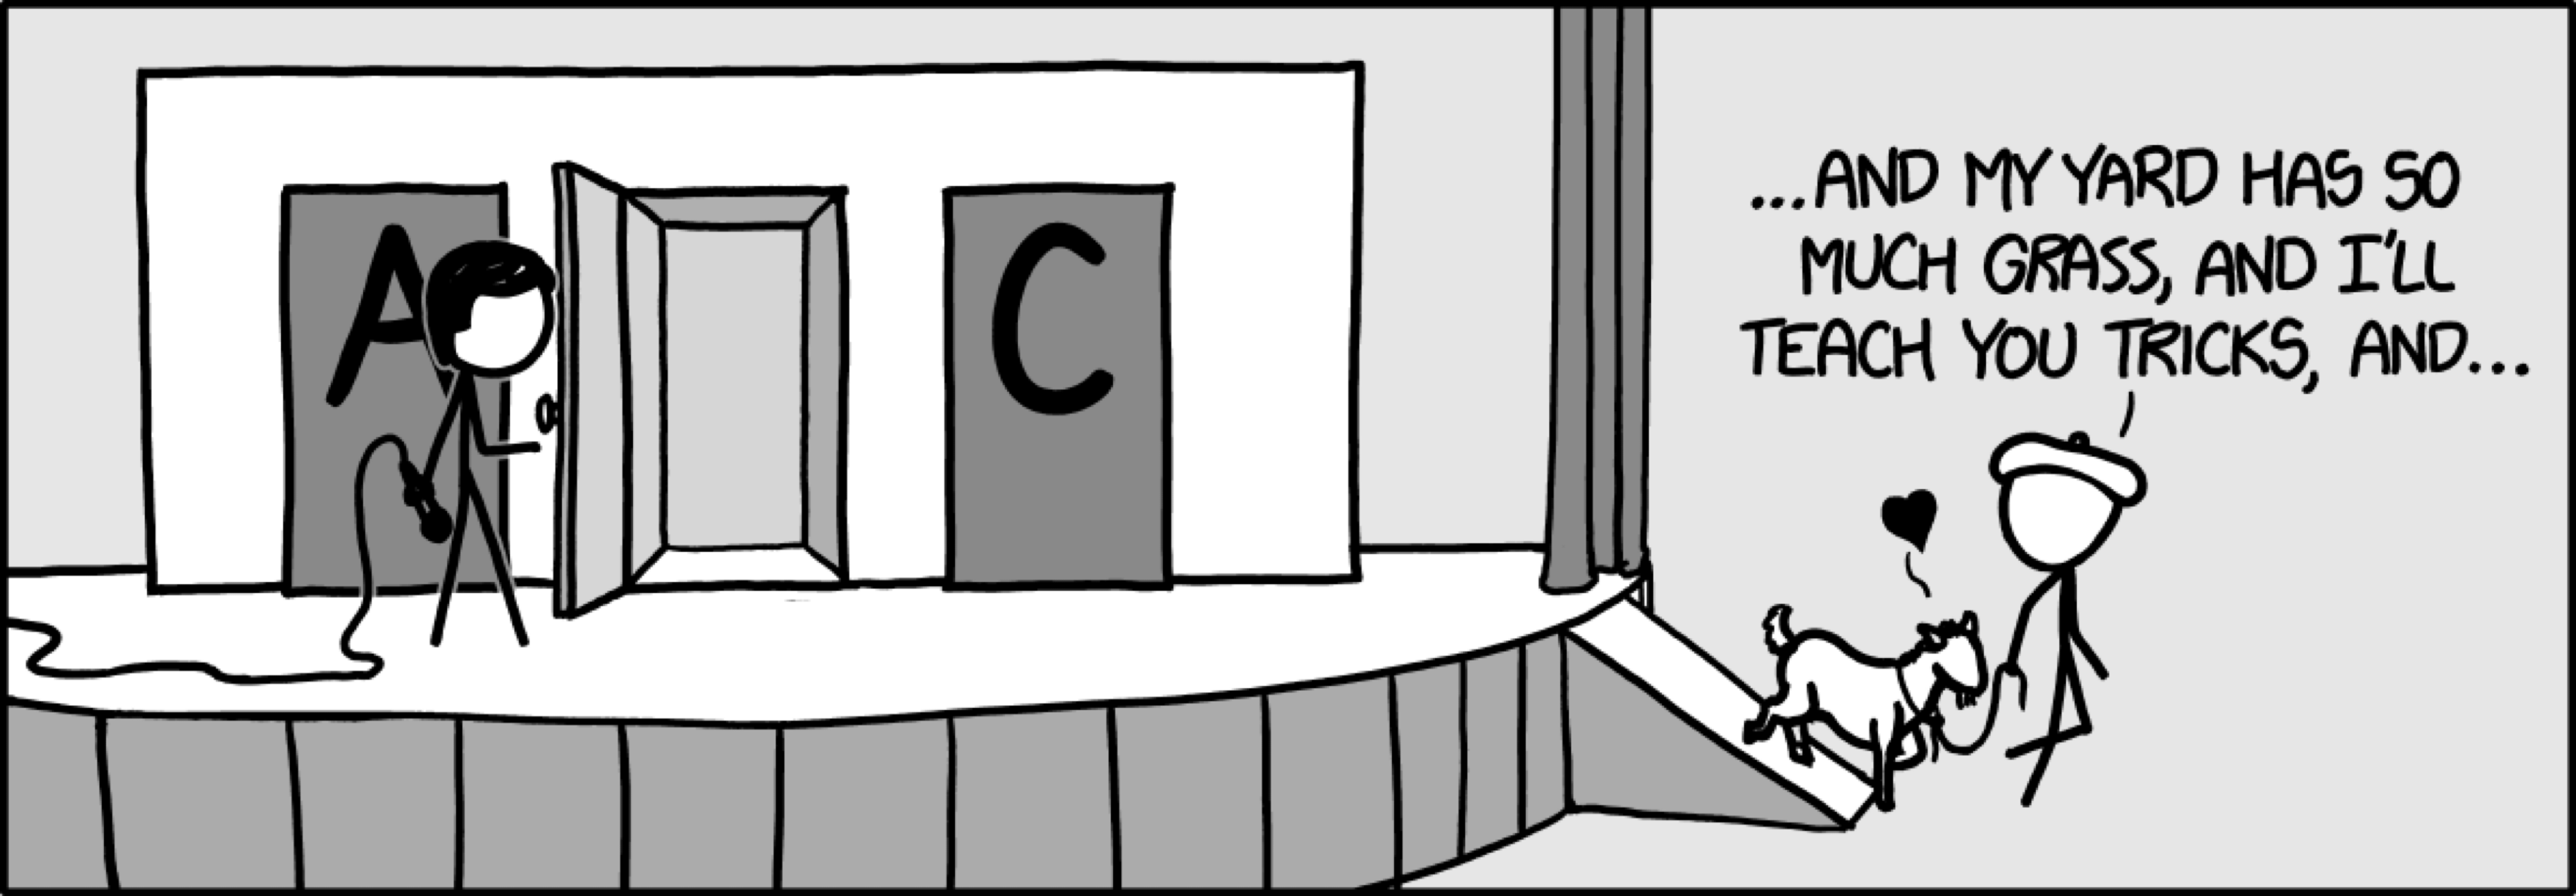